<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data (Part 1 - Data Cleaning and EDA)

## Problem Statement

This project aims to provide a reliable estimation of the value of properties located in the city of Ames in Iowa, USA. In this project, we will develop a regression model to predict the prices of properties based on a number of selected features. The accuracy and usefulness of the model will be evaluated by a number of metrics such as root mean squared error (RMSE) and R2 score. We hope that this model will potentially be useful to property investors that are looking to make a profit by flipping properties, or potential homeowners who do not want to pay a premium over the actual home value. 

## Imports

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import raw data

train_df = pd.read_csv("../datasets/train.csv")

In [3]:
train_df.shape

(2051, 81)

In [4]:
train_df.columns = train_df.columns.str.lower().str.replace(' ','_')

In [5]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Summary Statistics

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


'ms_subclass' represents the building class, which should be a categorical column even though the data is numerical in nature. We will convert it to the string format.

We notice that the max value for "garage_yr_blt" columns is 2207, which is likely a typo error. 

In [7]:
train_df['ms_subclass'] = train_df['ms_subclass'].apply(str)

In [8]:
train_df['garage_yr_blt'].value_counts().sort_index()

1895.0      1
1896.0      1
1900.0      3
1910.0      5
1914.0      2
1915.0      4
1916.0      5
1917.0      1
1918.0      1
1919.0      1
1920.0     21
1921.0      4
1922.0      6
1923.0      5
1924.0      4
1925.0      6
1926.0      8
1927.0      4
1928.0      6
1929.0      2
1930.0     20
1931.0      3
1932.0      2
1933.0      1
1934.0      2
1935.0      7
1936.0      7
1937.0      4
1938.0      6
1939.0     16
1940.0     20
1941.0     10
1942.0      6
1945.0     10
1946.0      5
1947.0      3
1948.0     14
1949.0     10
1950.0     32
1951.0     12
1952.0     10
1953.0     19
1954.0     25
1955.0     15
1956.0     31
1957.0     20
1958.0     32
1959.0     23
1960.0     21
1961.0     20
1962.0     25
1963.0     22
1964.0     25
1965.0     27
1966.0     29
1967.0     26
1968.0     32
1969.0     18
1970.0     20
1971.0     18
1972.0     17
1973.0     20
1974.0     19
1975.0     25
1976.0     35
1977.0     46
1978.0     33
1979.0     25
1980.0     22
1981.0     11
1982.0      6
1983.0

In [9]:
train_df[train_df['garage_yr_blt']==2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


The house was built in 2006 and remodelled in 2007, we can reasonably assume that the garage was built during the remodelling in 2007.

In [10]:
train_df.loc[1699,'garage_yr_blt'] = 2007

## Data Cleaning
### Dealing with missing/NaN values

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   object 
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [12]:
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

Referring to the data dictionary, we notice that most of the NaN values are due to the absence of features, hence for such scenarioes we will assign 'NA' if it is a categorical column, and 0 if it is a numerical column

In [13]:
# drop ID and PID column as they are identifier numbers and are unique for each row 
train_df.drop(['pid','id'], axis=1, inplace= True)

In [14]:
# drop rows with null values under columns with very low null values
low_null = ['bsmtfin_sf_1', 'garage_area', 'garage_cars', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
            'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']
train_df.dropna(subset=low_null, inplace=True)


# drop cols with high proportion of null values -> low variance even if assigned 'NA'
low_var_col = ['pool_qc', 'misc_feature', 'alley', 'fence']
train_df = train_df.drop(low_var_col, axis=1)

In [15]:
# replace null values with 'NA' to reflect absence of features (masonry veneer)
train_df['mas_vnr_type'] = train_df['mas_vnr_type'].fillna('NA')

# replace null values with 0 to reflect absence of features (masonry veneer)
train_df['mas_vnr_area'] = train_df['mas_vnr_area'].fillna(0)

# replace null values with 'NA' to reflect absence of features (garage)
garage_null = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
train_df[garage_null] = train_df[garage_null].fillna('NA')

# replace null values with 'NA' to reflect absence of features (fireplace)
train_df['fireplace_qu'] = train_df['fireplace_qu'].fillna('NA')

In [16]:
train_df[['garage_yr_blt', 'year_built', 'year_remod/add']].corr()

,garage_yr_blt,year_built,year_remod/add
garage_yr_blt,1.000000,0.838051,0.683894
year_built,0.838051,1.000000,0.630181
year_remod/add,0.683894,0.630181,1.000000


It is likely that the garage will be built either with the house or when the house was remodelled. By comparing the correlation coefficients of 'garage_yr_blt', 'year_built' and 'year_remod/add', it is a better choice to replace the missing values of 'garage_yr_blt' with 'year_built'.

In [17]:
# replace null values for 'Garage Yr Blt' with values from 'Year Built'
train_df['garage_yr_blt'] = train_df['garage_yr_blt'].fillna(train_df['year_built'])

In [18]:
#separate properties that do not have basement in new df
bsmt_null_train_df = train_df[train_df['bsmt_qual'].isnull()]
train_df.drop(bsmt_null_train_df.index, axis=0, inplace=True)

In [19]:
# replace null values with 'NA' to reflect absence of features (basement)
bsmt_null = ['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2']
bsmt_null_train_df[bsmt_null] = bsmt_null_train_df[bsmt_null].fillna('NA')

In [20]:
#concatenate back to original df
train_df = pd.concat(objs=[train_df,bsmt_null_train_df],axis=0)

In [21]:
train_df.groupby('lot_config')['lot_frontage'].mean()

lot_config
Corner     83.245552
CulDSac    55.228571
FR2        60.836735
FR3        85.285714
Inside     66.922960
Name: lot_frontage, dtype: float64

The NaN values under the Lot Frontage is neither too much/too little for us to drop the entire column or drop the specific rows respectively. Looking at the various features that may be related, the lot configuration seems the most logical as it decides the proportion of the property that is connected directly to the street. Therefore we will impute missing values with the mean lot frontage based on lot configuration.

In [22]:
#replace NaN values under lot_frontage column with mean values of lot_frontage (groupby via lot_configuration)
train_df['lot_frontage'] = train_df.groupby('lot_config')['lot_frontage'].transform(lambda value: value.fillna(value.mean()))

In [23]:
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

bsmt_exposure     3
bsmtfin_type_2    1
dtype: int64

There are only 3 to 4 rows with missing data, we will just drop these rows for convenience.

In [24]:
#drop remaining rows with null values 
train_df.dropna(axis=0,inplace=True)

In [25]:
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [26]:
train_df.shape

(2044, 75)

In [27]:
(2051-2044)/2051 * 100

0.3412969283276451

Now that our dataset is free of missing values, we can proceed with EDA and feature engineering.

We have only dropped 0.34% from the dataset, which is a reasonable proportion and it should not affect our model's accuracy. 

### Converting ordinal data to numerical data

In [28]:
train_df['lot_shape'] = train_df['lot_shape'].map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
train_df['utilities'] = train_df['utilities'].map({'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3})
train_df['land_slope'] = train_df['land_slope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
train_df['exter_qual'] = train_df['exter_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train_df['exter_cond'] = train_df['exter_cond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train_df['bsmt_qual'] = train_df['bsmt_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df['bsmt_cond'] = train_df['bsmt_cond'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df['bsmt_exposure'] = train_df['bsmt_exposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train_df['bsmtfin_type_1'] = train_df['bsmtfin_type_1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df['bsmtfin_type_2'] = train_df['bsmtfin_type_2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train_df['heating_qc'] = train_df['heating_qc'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train_df['central_air'] = train_df['central_air'].map({'N':0, 'Y':1})
train_df['kitchen_qual'] = train_df['kitchen_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train_df['functional'] = train_df['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
train_df['fireplace_qu'] = train_df['fireplace_qu'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df['garage_finish'] = train_df['garage_finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
train_df['garage_qual'] = train_df['garage_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df['garage_cond'] = train_df['garage_cond'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train_df['paved_drive'] = train_df['paved_drive'].map({'N':0, 'P':1, 'Y':2})

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2010
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2044 non-null   object 
 1   ms_zoning        2044 non-null   object 
 2   lot_frontage     2044 non-null   float64
 3   lot_area         2044 non-null   int64  
 4   street           2044 non-null   object 
 5   lot_shape        2044 non-null   int64  
 6   land_contour     2044 non-null   object 
 7   utilities        2044 non-null   int64  
 8   lot_config       2044 non-null   object 
 9   land_slope       2044 non-null   int64  
 10  neighborhood     2044 non-null   object 
 11  condition_1      2044 non-null   object 
 12  condition_2      2044 non-null   object 
 13  bldg_type        2044 non-null   object 
 14  house_style      2044 non-null   object 
 15  overall_qual     2044 non-null   int64  
 16  overall_cond     2044 non-null   int64  
 17  year_built    

In [30]:
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,55.228571,13517,Pave,1,Lvl,3,CulDSac,0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,4,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.000000,11492,Pave,1,Lvl,3,CulDSac,0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,4,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.000000,7922,Pave,0,Lvl,3,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,2,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.000000,9802,Pave,0,Lvl,3,Inside,0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,3,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.000000,14235,Pave,1,Lvl,3,Inside,0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,3,2010,WD,138500


## EDA

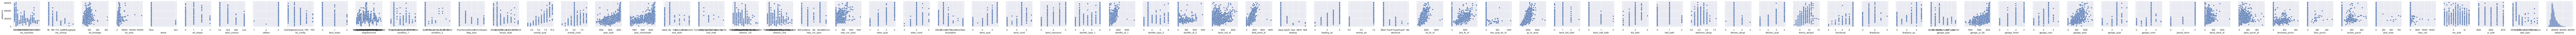

In [31]:
# overview of all feature columns' interaction with 'saleprice' column
sns.pairplot(train_df,x_vars=train_df.columns, y_vars=['saleprice'])

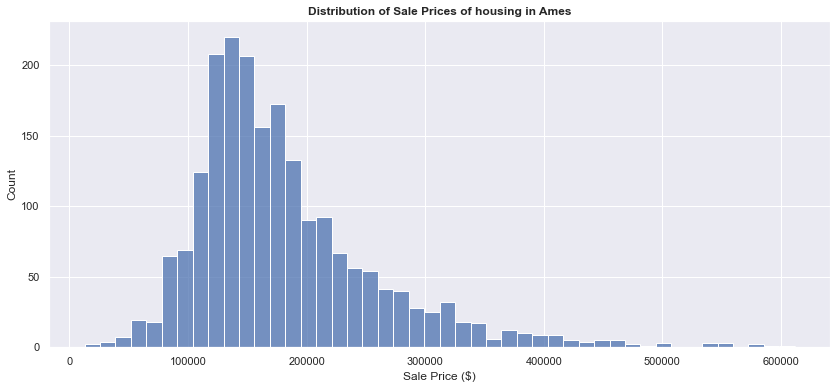

In [32]:
plt.figure(figsize=(14,6))
sns.histplot(data=train_df,x='saleprice')

plt.xlabel('Sale Price ($)')
plt.title('Distribution of Sale Prices of housing in Ames', weight='bold');

The distribution of sale price is right skewed. There were a few houses that had a much higher sale price than the rest.

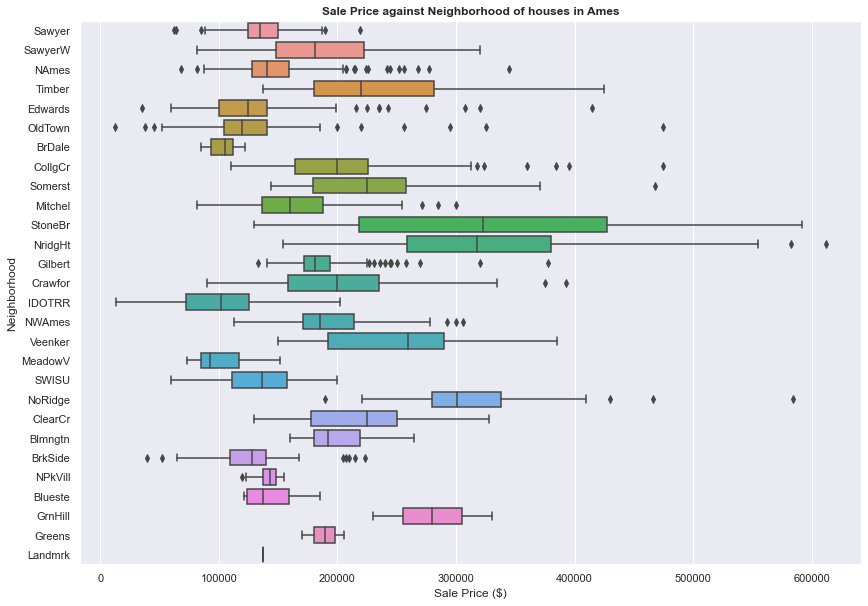

In [33]:
plt.figure(figsize=(14,10))
sns.boxplot(data=train_df, x='saleprice', y='neighborhood', orient='h')

plt.xlabel('Sale Price ($)')
plt.ylabel('Neighborhood')
plt.title('Sale Price against Neighborhood of houses in Ames', weight='bold');

The sale prices for houses in most neighborhoods were mostly below the sale price of $300000, whereas houses with higher sale price were found in the neighborhoods of Stone Brook, Northridge Heights and Northridge.

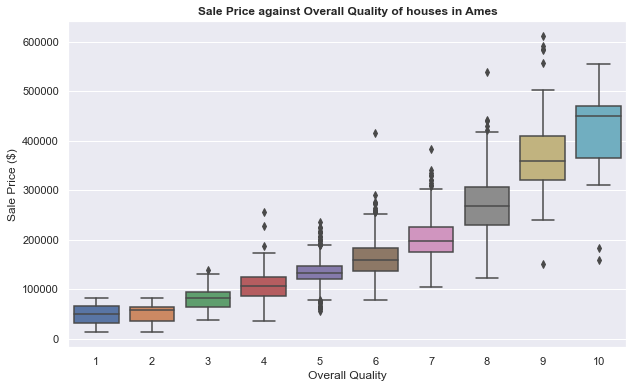

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='overall_qual', y='saleprice')

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price against Overall Quality of houses in Ames', weight='bold');

From the boxplot above, it is obvious that as overall quality of the houses increases, so does the sale price.

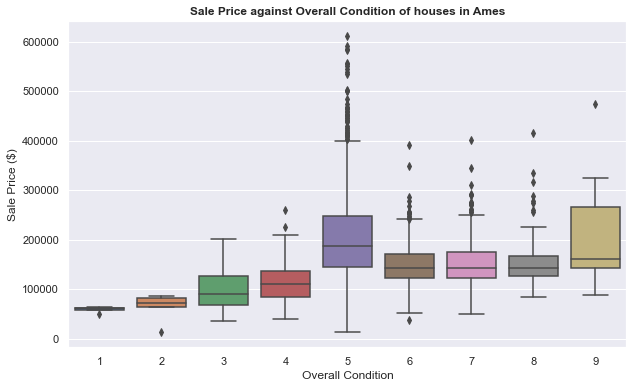

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='overall_cond', y='saleprice')

plt.xlabel('Overall Condition')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price against Overall Condition of houses in Ames', weight='bold');

Here, we can tell that generally sale prices of houses increase with the overall condition of houses.

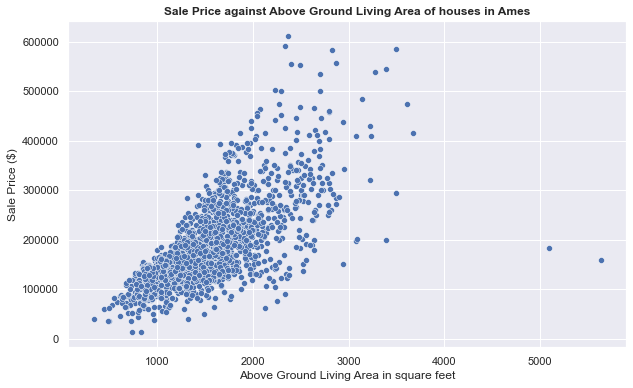

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='gr_liv_area', y='saleprice')

plt.xlabel('Above Ground Living Area in square feet')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price against Above Ground Living Area of houses in Ames', weight='bold');

From the boxplot above, we observe a clear trend that sale prices of houses increase with above ground living area. There are also 2 outlier data points that falls way outside the trend which should be removed from our dataset.

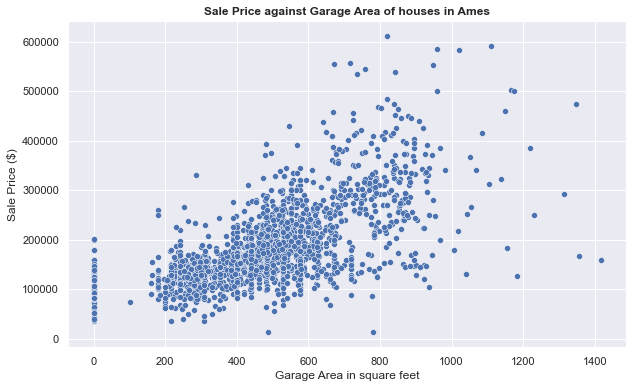

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='garage_area', y='saleprice')

plt.xlabel('Garage Area in square feet')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price against Garage Area of houses in Ames', weight='bold');

From the boxplot above, we can see that sale prices of houses increase with garage size.

## Remove Outliers

In [38]:
# remove outliers that have high Gr Liv Area but relatively lower sale price
train_df = train_df.drop(train_df[train_df['gr_liv_area'] > 4000].index, axis=0)

## Feature Engineering
### Removing featuring columns with duplicate information

In [39]:
train_df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,55.228571,13517,Pave,1,Lvl,3,CulDSac,0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,4,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.000000,11492,Pave,1,Lvl,3,CulDSac,0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,4,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.000000,7922,Pave,0,Lvl,3,Inside,0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,2,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.000000,9802,Pave,0,Lvl,3,Inside,0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,3,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.000000,14235,Pave,1,Lvl,3,Inside,0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,3,2010,WD,138500


In [40]:
fteng_df = train_df[['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','saleprice']]
fteng_df['bsmt_fin_unf'] = train_df['bsmtfin_sf_1'] + train_df['bsmtfin_sf_2'] + train_df['bsmt_unf_sf']
fteng_df.corr()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,saleprice,bsmt_fin_unf
bsmtfin_sf_1,1.000000,-0.052580,-0.503265,0.490309,0.447098,0.490309
bsmtfin_sf_2,-0.052580,1.000000,-0.235216,0.088387,0.014889,0.088387
bsmt_unf_sf,-0.503265,-0.235216,1.000000,0.434757,0.189579,0.434757
total_bsmt_sf,0.490309,0.088387,0.434757,1.000000,0.669201,1.000000
saleprice,0.447098,0.014889,0.189579,0.669201,1.000000,0.669201
bsmt_fin_unf,0.490309,0.088387,0.434757,1.000000,0.669201,1.000000


Adding the feature columns 'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf' proved to be similar to the feature column 'total_bsmt_sf' by looking at the correlation coefficients above.

We can safely remove these 3 feature columns to avoid multicollinearity.

In [41]:
fteng_df = train_df[['bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','saleprice']]
fteng_df['total_bath'] = train_df['bsmt_full_bath'] + train_df['bsmt_half_bath'] + train_df['full_bath'] + train_df['half_bath']
fteng_df.corr()

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,saleprice,total_bath
bsmt_full_bath,1.000000,-0.149820,-0.010856,-0.028607,0.284754,0.494171
bsmt_half_bath,-0.149820,1.000000,-0.061076,-0.049903,-0.045361,0.122109
full_bath,-0.010856,-0.061076,1.000000,0.153058,0.537801,0.643216
half_bath,-0.028607,-0.049903,0.153058,1.000000,0.283467,0.593917
saleprice,0.284754,-0.045361,0.537801,0.283467,1.000000,0.611485
total_bath,0.494171,0.122109,0.643216,0.593917,0.611485,1.000000


Forming a new feature column of the total number of bathrooms seems to have a better correlation with the sale price, hence we will drop the other columns and use the new feature columns instead

In [42]:
fteng_df = train_df[['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area','saleprice']]
fteng_df['added_sf'] = train_df['1st_flr_sf'] + train_df['2nd_flr_sf'] + train_df['low_qual_fin_sf']
fteng_df.corr()

,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,saleprice,added_sf
1st_flr_sf,1.000000,-0.283808,-0.009635,0.523886,0.652062,0.523886
2nd_flr_sf,-0.283808,1.000000,0.014753,0.661753,0.250213,0.661753
low_qual_fin_sf,-0.009635,0.014753,1.000000,0.111352,-0.041563,0.111352
gr_liv_area,0.523886,0.661753,0.111352,1.000000,0.720935,1.000000
saleprice,0.652062,0.250213,-0.041563,0.720935,1.000000,0.720935
added_sf,0.523886,0.661753,0.111352,1.000000,0.720935,1.000000


Again, we can remove the feature columns '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf' and keep the feature column 'gr_liv_area' to avoid multi-collinearity.

In [43]:
# Adding/removing the necessary feature columns as described above

#create new feature columns
train_df['total_bath'] = train_df['bsmt_full_bath'] + train_df['bsmt_half_bath'] + train_df['full_bath'] + train_df['half_bath']

#remove feature columns
to_drop=['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf',
        'bsmt_full_bath','bsmt_half_bath','full_bath','half_bath',
        '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf']
train_df = train_df.drop(to_drop,axis=1)

### Remove feature columns with low variance/low correlation to sale price

In [44]:
def low_var_col(df):
    
    """
    Identify low_var feature columns if >0.9 of column data belongs to any feature variable
    """
    
    low_var_col = []

    for col in df.columns:
        temp_df = df[col].value_counts(normalize=True)
        counts = 0
        for value, perc in temp_df.iteritems():
            if perc > 0.9:
                counts += 1
    
        if counts > 0:
            low_var_col.append(col)
            
    print(f"Low variance columns: ", low_var_col)
    return low_var_col

In [45]:
def low_corr_col(df):
    
    """
    Identify feature columns with low correlation coefficients (<0.6) with 'SalePrice' column
    """
    
    low_corr_col = []

    temp_df = df.corr()['saleprice'].abs()
    for col, corr in temp_df.iteritems():
        if corr < 0.6:
            low_corr_col.append(col)
    print(f"Low correlation columns: ", low_corr_col)
    return low_corr_col

In [46]:
#low variance filter
train_df.drop(columns=low_var_col(train_df), axis=1, inplace=True)

Low variance columns:  ['street', 'utilities', 'land_slope', 'condition_2', 'roof_matl', 'heating', 'central_air', 'electrical', 'kitchen_abvgr', 'functional', 'garage_cond', 'paved_drive', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']


We chose to remove feature columns that had low variance (>90% of data belonging to a feature variable), since they would not improve the model's performance.

In [47]:
train_df.corr()['saleprice'].abs().sort_values(ascending=False)

saleprice         1.000000
overall_qual      0.804477
gr_liv_area       0.720935
exter_qual        0.715720
kitchen_qual      0.694044
total_bsmt_sf     0.669201
garage_area       0.654984
garage_cars       0.648238
bsmt_qual         0.618352
total_bath        0.611485
year_built        0.572542
garage_finish     0.559642
garage_yr_blt     0.556962
year_remod/add    0.550244
fireplace_qu      0.538727
mas_vnr_area      0.511452
totrms_abvgrd     0.508741
fireplaces        0.472835
heating_qc        0.459194
bsmt_exposure     0.429019
bsmtfin_type_1    0.352242
open_porch_sf     0.338271
lot_frontage      0.331826
wood_deck_sf      0.328904
lot_area          0.302487
lot_shape         0.297016
garage_qual       0.285763
bsmt_cond         0.228261
bedroom_abvgr     0.135447
enclosed_porch    0.135232
overall_cond      0.096688
exter_cond        0.036666
mo_sold           0.030980
yr_sold           0.016136
bsmtfin_type_2    0.015025
Name: saleprice, dtype: float64

In [63]:
low_corr_train = low_corr_col(train_df)
low_corr_train
#feature cols with <0.6 corr coef

Low correlation columns:  ['year_built', 'age_house']


['year_built', 'age_house']

In [51]:
# drop feature cols with <0.6 corr coef
train_df.drop(columns=low_corr_train, axis=1, inplace=True)

In [52]:
train_df.shape

(2042, 26)

<AxesSubplot:>

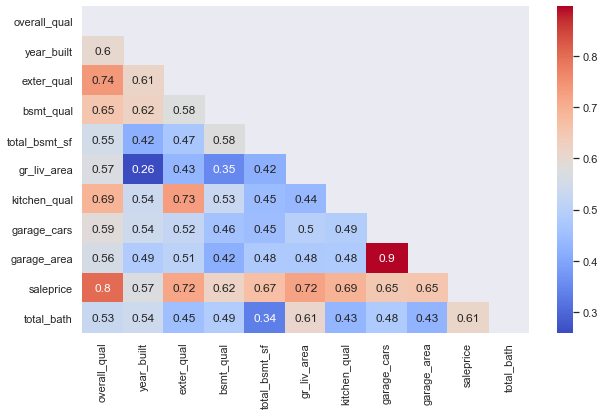

In [53]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(train_df.corr(), dtype=bool))
sns.heatmap(train_df.corr(),mask=mask, annot=True, cmap='coolwarm')

In [54]:
# drop col with high correlation to others to avoid multicollinearity
train_df.drop('garage_area', axis=1, inplace=True)

From the above heatmap, we can see a high correlation between 'garage_area' and 'garage_cars'. We removed 'garage_area' to avoid multicollinearity and also 'garage_cars' seem like a better estimation for garage size.

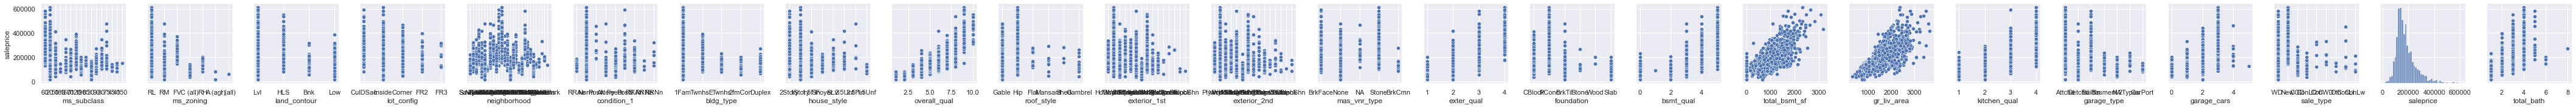

In [54]:
sns.pairplot(train_df,x_vars=train_df.columns, y_vars=['saleprice'])

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 0 to 2010
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ms_subclass    2042 non-null   object 
 1   ms_zoning      2042 non-null   object 
 2   land_contour   2042 non-null   object 
 3   lot_config     2042 non-null   object 
 4   neighborhood   2042 non-null   object 
 5   condition_1    2042 non-null   object 
 6   bldg_type      2042 non-null   object 
 7   house_style    2042 non-null   object 
 8   overall_qual   2042 non-null   int64  
 9   year_built     2042 non-null   int64  
 10  roof_style     2042 non-null   object 
 11  exterior_1st   2042 non-null   object 
 12  exterior_2nd   2042 non-null   object 
 13  mas_vnr_type   2042 non-null   object 
 14  exter_qual     2042 non-null   int64  
 15  foundation     2042 non-null   object 
 16  bsmt_qual      2042 non-null   int64  
 17  total_bsmt_sf  2042 non-null   float64
 18  gr_liv_a

## Post-modelling feature engineering

With the above cleaned dataset, we proceeded to run linear regression and elastic net model on default parameters to check the performance of the models. (Part 2)


Baseline Model 
* RMSE:  86599.7335454719
* R2:  -0.006441857902327319

Linear Regression Model 
* Linear Regression Model train RMSE:  24338.625468760893
* Linear Regression Model test RMSE:  28542.610310052383
* Linear Regression Model train R2 score:  0.8994115813486588
* Linear Regression Model test R2 score:  0.8906690918401622
* Linear Regression Model cross validation score:  0.8633217382372681

Ridge Model
* Ridge Model train RMSE:  24350.030399145446
* Ridge Model test RMSE:  28454.925228933476
* Ridge Model train R2 score:  0.8993172890312856
* Ridge Model test R2 score:  0.8913398058305921
* Ridge Model cross validation score:  0.8643050690883545

Lasso model
* Lasso Model train RMSE:  24338.97328878949
* Lasso Model test RMSE:  28515.569689388834
* Lasso Model train R2 score:  0.8994087063369461
* Lasso Model test R2 score:  0.890876148950966
* Lasso Model cross validation score:  0.8632022155080321

Elastic Net Model 
* Elastic Net Model train RMSE:  27028.04519182977
* Elastic Net Model test RMSE:  31672.38001268538
* Elastic Net Model train R2 score:  0.8759533163207932
* Elastic Net Model test R2 score:  0.8653777086142455
* Elastic Net Model cross validation score:  0.8566994143281962

## Export cleaned data

In [56]:
train_df.to_csv('../datasets/train_cleaned.csv', index=False)